## **Análise por País**

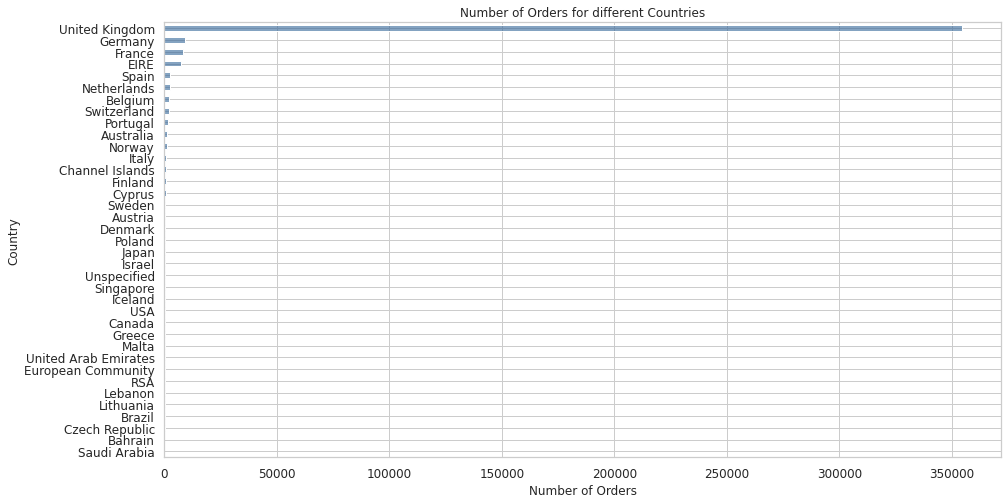

In [ ]:
group_ordens_pais = df_retail.groupby('Pais')['DataHoraTransacao'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_ordens_pais.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

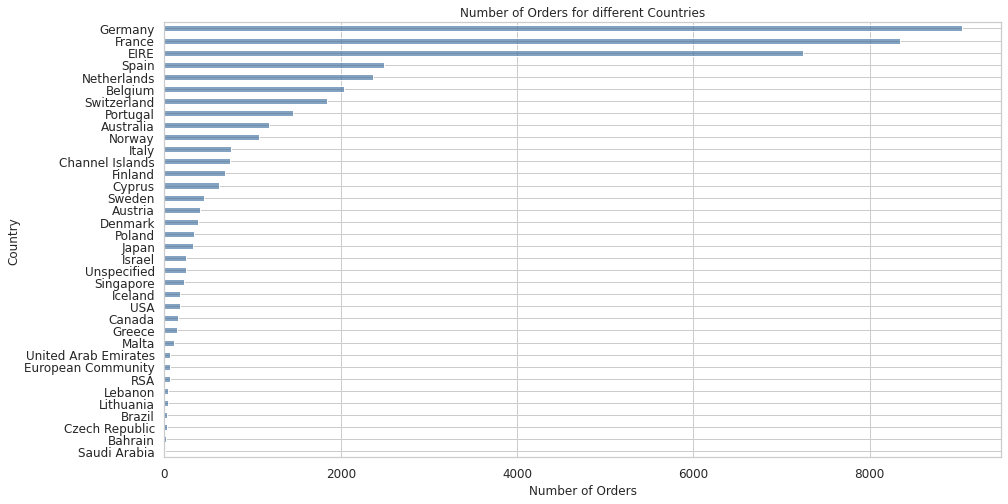

In [ ]:
#Excluindo UK
group_ordens_pais = df_retail.groupby('Pais')['DataHoraTransacao'].count().sort_values()
group_ordens_pais_sem_uk = group_ordens_pais.copy()
del group_ordens_pais_sem_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_ordens_pais_sem_uk.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

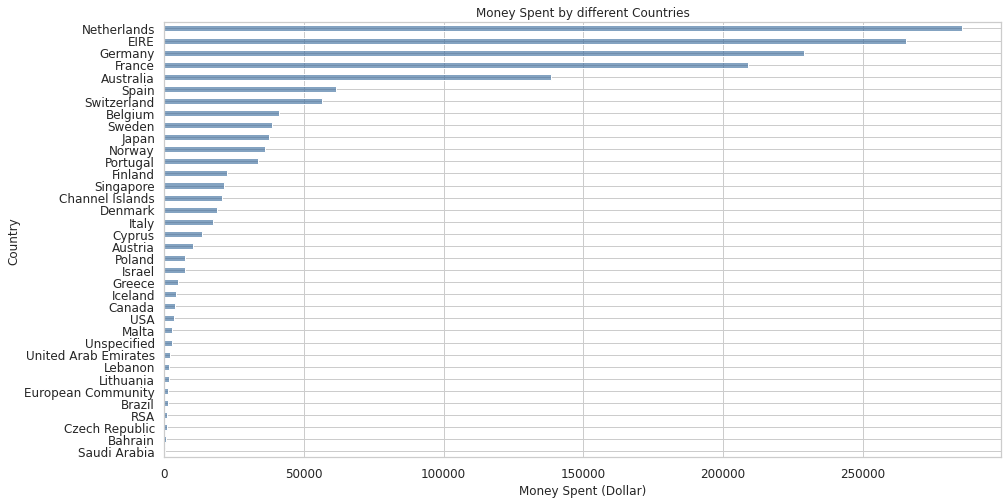

In [ ]:
# Valor Gasto por Cada Pais (Sem UK)
group_country_valor_gasto = df_retail.groupby('Pais')['TotalGasto'].sum().sort_values()
del group_country_valor_gasto['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_valor_gasto.plot(kind='barh', fontsize=12, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## **Análise dos Clientes**

In [ ]:
data_min = df_retail['DataHoraTransacao'].min()
print(data_min)

2010-12-01 08:26:00


In [ ]:
data_max = df_retail['DataHoraTransacao'].max()
print(data_max)

2011-12-09 12:50:00


In [ ]:
# Get our date range for our data
print(f"Dias {data_max - data_min}")

Dias 373 days 04:24:00


In [ ]:
df_retail = df_retail.loc[df_retail['DataHoraTransacao'] < '2011-12-01']

In [ ]:
df_retail.head()

,NumFatura,CodigoProduto,AnoEMes,NomeProduto,QuantProduto,hora,DataHoraTransacao,PrecoUnitario,NumCliente,Pais,TotalGasto,AnoMes,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,4,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,4,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,4,335,48,4


In [ ]:
#Valor Gasto por Fatura (Associando ao Cliente e ao Pais)
invoice_customer_df = df_retail.groupby(by=['NumFatura','DataHoraTransacao']).agg({'TotalGasto': sum,'NumCliente': max,'Pais': max,}).reset_index()       

In [ ]:
invoice_customer_df.head()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [ ]:
invoice_customer_df = df_retail.groupby(by=['NumFatura','DataHoraTransacao']).agg({'TotalGasto': sum,'NumCliente': max,'Pais': max,}).reset_index().sort_values(by='TotalGasto', ascending=False) 

In [ ]:
invoice_customer_df.head()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom


In [ ]:
invoice_customer_df.tail()

,NumFatura,DataHoraTransacao,TotalGasto,NumCliente,Pais
13819,570554,2011-10-11 11:02:00,0.38,14800,United Kingdom
17390,578841,2011-11-25 15:57:00,0.00,13256,United Kingdom
2730,543599,2011-02-10 13:08:00,0.00,17560,United Kingdom
12875,568384,2011-09-27 09:46:00,0.00,12748,United Kingdom
11327,564651,2011-08-26 14:19:00,0.00,14646,Netherlands



    

*   Definimos nosso índice para a data da nossa fatura
*   E usar Grouper (freq = 'M') agrupa dados pelo índice 'InvoiceDate' por Mês
*   Em seguida, agrupamos esses dados por CustomerID e contamos o número de clientes repetidos exclusivos para aquele mês (os dados são a data de término do mês)
*   A função de filtro nos permite subselecionar dados pela regra em nossa função lambda, ou seja, aqueles maiores que 1 (clientes repetidos)











In [ ]:
# O mês que houve maior número de transação foi o mês de novembro de 2011
monthly_repeat_customers_df = invoice_customer_df.set_index('DataHoraTransacao').groupby(
    [pd.Grouper(freq='M'), 'NumCliente']).filter(lambda x: len(x) > 1).resample('M').nunique()['NumCliente']

monthly_repeat_customers_df

DataHoraTransacao
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: NumCliente, dtype: int64

In [ ]:
# Maior número de clientes e vendas foi novembro de 2011
#Número de Clientes por Mês
monthly_unique_customers_df = df_retail.set_index('DataHoraTransacao')['NumCliente'].resample('M').nunique()
monthly_unique_customers_df

DataHoraTransacao
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: NumCliente, dtype: int64

In [ ]:
#Taxa de repetição para clientes únicos
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

DataHoraTransacao
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: NumCliente, dtype: float64

## **Análises Realizadas:**



1.   O dia da semana em que há mais vendas é quinta-feira, logo após quarta-feira e depois terça-feira, ou seja, **vendem-se mais durante semana**.
2.   A hora em que **existem mais pedidos é durante a hora de almoço**, às 12horas.
3.   Houve **maior número de itens grátis durante o mês de novembro de 2011**, ou seja, à véspera de acabar o ano (vide "blackfriday" rs).
4.   O país que **mais realizou vendas foi United Kingdom**, superando a margem de 350 mil ordens; já a Alemanha vem atrás com aproximadamente 9 mil e depois França com aproximadamente 8 mil, ou seja, principais país da Europa centraram maior número de ordens de vendas.
5.   Já os **Países Baixos e Irlanda** (Netherland e EIRE), foram os **países com maior número de gastos**, 290 mil e 270 mil aproximadamente cada.
6.   As transações tiveram início em 01/12/2010 e terminaram em 09/12/2011, percorrendo o **total de 373 dias de vendas.**
7.   O** mês de novembro de 2011 foi o mês com maior número de vendas** e maior número de clientes consequentemente.








